In [122]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats

【問題10】クラスタ数kの選択
---
>最適だと思われるクラスタ数 𝑘 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

参考URL:https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

(Minimum, Maximum, Mean, Std. Deviation)
FRESH ( 3, 112151, 12000.30, 12647.329)
MILK (55, 73498, 5796.27, 7380.377)
GROCERY (3, 92780, 7951.28, 9503.163)
FROZEN (25, 60869, 3071.93, 4854.673)
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

CHANNEL Frequency
Horeca 298
Retail 142
Total 440

In [123]:
df_origin = pd.read_csv('/Users/harakenken22/diveintocode-ml/Wholesale customers data.csv')
print(df_origin)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [124]:
df_drop = df_origin.drop(columns=['Region', 'Channel'])

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [126]:
print(data_pca)

[[ 6.50022122e+02  1.58551909e+03]
 [-4.42680498e+03  4.04245151e+03]
 [-4.84199871e+03  2.57876218e+03]
 [ 9.90346437e+02 -6.27980600e+03]
 [ 1.06579987e+04 -2.15972582e+03]
 [-2.76596159e+03 -9.59870727e+02]
 [-7.15550892e+02 -2.01300227e+03]
 [-4.47458367e+03  1.42949697e+03]
 [-6.71209540e+03 -2.20590916e+03]
 [-4.82363435e+03  1.34805592e+04]
 [-7.97482898e+03  5.71121893e+03]
 [ 3.63937790e+01 -6.03789641e+03]
 [ 1.99402021e+04  4.59128648e+03]
 [ 9.39669558e+03  5.91315704e+03]
 [ 1.26603704e+04  4.54194543e+03]
 [-2.99772590e+03 -6.09387930e+03]
 [-1.05895236e+04  6.58421594e+03]
 [-6.36709518e+03 -3.68071267e+03]
 [ 6.62382534e+03  1.25471953e+03]
 [-4.86153157e+03 -2.25592266e+02]
 [ 4.79424416e+03 -3.98879936e+03]
 [-7.24486684e+03 -7.34772325e+03]
 [ 1.92992657e+04 -6.93681068e+03]
 [ 1.99410882e+04  2.63126546e+04]
 [ 1.14930749e+04  6.17138651e+03]
 [ 3.30994467e+03 -1.16125675e+03]
 [-2.96863906e+03 -7.15886854e+03]
 [ 8.72160231e+02 -7.60388820e+03]
 [-4.89551897e+03  2

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


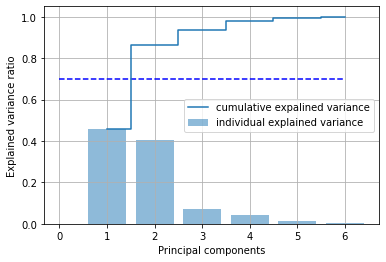

In [127]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [128]:
from sklearn.cluster import KMeans

cust_array = np.array([df['Fresh'].tolist(),
                       df['Milk'].tolist(),
                       df['Grocery'].tolist(),
                       df['Frozen'].tolist(),
                       df['Milk'].tolist(),
                       df['Detergents_Paper'].tolist(),
                       df['Delicassen'].tolist()
                       ], np.int32)

cust_array = cust_array.T
pred = KMeans(n_clusters=4).fit_predict(cust_array)
print(pred)

[2 2 2 2 0 2 2 2 2 1 2 2 0 0 0 2 1 2 2 2 2 2 0 3 0 2 2 2 1 0 2 2 0 0 2 2 0
 1 1 0 0 2 1 1 2 1 1 3 2 1 2 2 0 1 0 2 1 1 2 2 2 3 2 1 2 1 2 0 2 2 2 2 2 0
 2 0 2 1 2 2 2 1 2 0 2 3 3 0 2 0 2 2 1 2 1 2 2 2 2 2 2 1 2 0 2 2 2 1 2 1 2
 1 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 1 2 2
 2 0 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 0 2 2 2 2 3 1 3 2
 2 2 2 2 1 2 2 2 1 2 2 0 2 2 2 1 1 0 2 2 1 2 2 2 1 2 1 2 2 2 1 1 2 1 2 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 1 2 2 2 2 2 1 2 0 1 0 2 2 0
 0 2 2 0 2 1 1 1 0 1 2 2 2 2 0 2 2 0 2 2 2 2 2 0 0 0 0 2 2 2 0 2 2 2 1 0 2
 2 2 2 2 2 1 2 2 1 1 1 2 2 1 2 0 1 2 2 1 2 2 2 1 2 2 2 2 0 0 2 2 2 2 2 1 0
 1 2 0 2 2 2 2 2 2 2 1 2 2 1 0 2 1 2 1 2 1 2 2 0 1 1 2 2 2 2 2 2 2 2 2 0 2
 0 0 2 2 2 2 1 0 2 2 0 2 0 2 1 2 2 0 2 2 2 2 2 0 2 2 1 2 2 2 2 0 0 0 2 2 0
 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 0 2 2 2 1 0 2 2 2 2 0 2 2 0 0 1 2 2]


In [129]:
df['cluster_id']=pred

In [130]:
df['cluster_id'].value_counts()

2    282
1     76
0     75
3      7
Name: cluster_id, dtype: int64

In [131]:
df[df['cluster_id']==0].mean()

Fresh                 31538.173333
Milk                   4522.773333
Grocery                5660.666667
Frozen                 5329.400000
Detergents_Paper       1076.693333
Delicassen             1963.760000
cluster_id                0.000000
cluster_id_Region         2.573333
cluster_id_Channel        2.573333
dtype: float64

In [132]:
df[df['cluster_id']==1].mean()

Fresh                  4875.434211
Milk                  12935.842105
Grocery               20024.592105
Frozen                 1668.802632
Detergents_Paper       9007.039474
Delicassen             1722.855263
cluster_id                1.000000
cluster_id_Region         2.460526
cluster_id_Channel        2.460526
dtype: float64

In [133]:
df[df['cluster_id']==2].mean()

Fresh                 7976.645390
Milk                  3211.709220
Grocery               4438.804965
Frozen                2672.460993
Detergents_Paper      1352.046099
Delicassen            1089.996454
cluster_id               2.000000
cluster_id_Region        2.546099
cluster_id_Channel       2.546099
dtype: float64

In [134]:
df[df['cluster_id']==3].mean()

Fresh                 42117.285714
Milk                  46046.142857
Grocery               42914.285714
Frozen                10211.714286
Detergents_Paper      17327.571429
Delicassen            12192.142857
cluster_id                3.000000
cluster_id_Region         3.000000
cluster_id_Channel        3.000000
dtype: float64

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

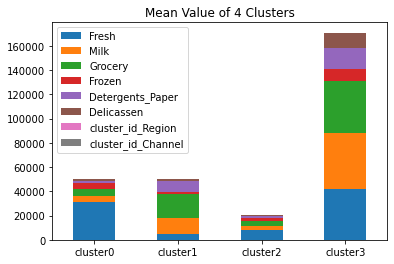

In [135]:
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

今回の結果では、累計寄与率がになると大幅に少なくなってしまうため、第１主成分と第２主成分で本データの説明を行うことができる。
クラスター数は第２主成分までのでのデータをもちいいるので、クラスター数は２である。

【問題11】既知のグループとの比較
---
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [136]:
df['cluster_id_Region'] = df_origin['Region']

In [141]:
df['cluster_id_Channel'] = df_origin['Channel'] 

In [142]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id,cluster_id_Region,cluster_id_Channel
0,12669,9656,7561,214,2674,1338,2,3,2
1,7057,9810,9568,1762,3293,1776,2,3,2
2,6353,8808,7684,2405,3516,7844,2,3,2
3,13265,1196,4221,6404,507,1788,2,3,1
4,22615,5410,7198,3915,1777,5185,0,3,2
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,3,1
436,39228,1431,764,4510,93,2346,0,3,1
437,14531,15488,30243,437,14841,1867,1,3,2
438,10290,1981,2232,1038,168,2125,2,3,1


[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

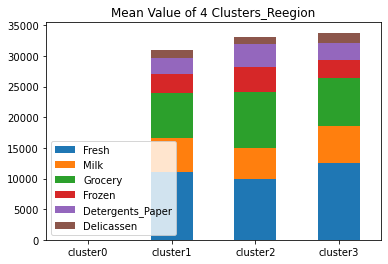

In [143]:
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id_Region'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
clusterinfo = clusterinfo.drop('cluster_id_Region')
clusterinfo = clusterinfo.drop('cluster_id_Channel')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters_Reegion")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

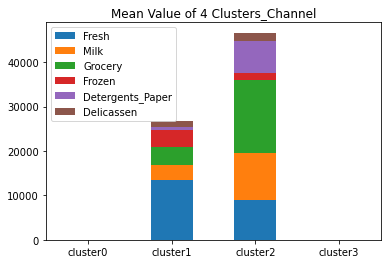

In [144]:
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id_Channel'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
clusterinfo = clusterinfo.drop('cluster_id_Region')
clusterinfo = clusterinfo.drop('cluster_id_Channel')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters_Channel")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

In [145]:
df.info

<bound method DataFrame.info of      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  cluster_id  \
0    12669   9656     7561     214              2674        1338           2   
1     7057   9810     9568    1762              3293        1776           2   
2     6353   8808     7684    2405              3516        7844           2   
3    13265   1196     4221    6404               507        1788           2   
4    22615   5410     7198    3915              1777        5185           0   
..     ...    ...      ...     ...               ...         ...         ...   
435  29703  12051    16027   13135               182        2204           0   
436  39228   1431      764    4510                93        2346           0   
437  14531  15488    30243     437             14841        1867           1   
438  10290   1981     2232    1038               168        2125           2   
439   2787   1698     2510      65               477          52           2   

     cl

【問題12】卸売業者にとって有益な情報
---
>卸売業者にとって有益な情報を探し出し文章にまとめてください。
《ヒント》
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。
条件ごとにデータを見る際にはPandasのgroupbyが便利です。

In [151]:
df.groupby(['cluster_id', 'cluster_id_Region', 'cluster_id_Channel']).describe()

Fresh                \
                                                 count          mean   
cluster_id cluster_id_Region cluster_id_Channel                        
0          1                 1                    12.0  32573.750000   
                             2                     1.0  20782.000000   
           2                 1                     5.0  26384.600000   
                             2                     1.0  27082.000000   
           3                 1                    45.0  33395.288889   
                             2                    11.0  26536.636364   
1          1                 1                     3.0   6364.666667   
                             2                    12.0   4302.166667   
           2                 2                    11.0   4566.545455   
           3                 1                     4.0   6317.500000   
                             2                    46.0   4876.326087   
2          1                 1                    44.0   7983.045455   
                             2                     5.0   4238.400000   
           2                 1                    23.0   8447.478261   
                             2                     7.0   8741.714286   
           3                 1                   160.0   7820.081250   
                             2                    43.0   8610.953488   
3          3                 1                     2.0  74499.000000   
                             2                     5.0  29164.600000   

                                                                        \
                                                          std      min   
cluster_id cluster_id_Region cluster_id_Channel                          
0          1                 1                   12447.851769  20893.0   
                             2                            NaN  20782.0   
           2                 1                    4834.041456  21273.0   
                             2                            NaN  27082.0   
           3                 1                   12725.121535  20049.0   
                             2                    7598.958090  19899.0   
1          1                 1                    3807.007530   2806.0   
                             2                    4078.762331     18.0   
           2                 2                    3981.976353    161.0   
           3                 1                    6533.068115    694.0   
                             2                    5106.007765     37.0   
2          1                 1                    5423.597729    514.0   
                             2                    3823.583568   2362.0   
           2                 1                    5866.818441      3.0   
                             2                    5808.144532   2599.0   
           3                 1                    5600.337936      3.0   
                             2                    5511.267255     23.0   
3          3                 1                   53247.969050  36847.0   
                             2                   11147.101610  16117.0   

                                                                              \
                                                      25%      50%       75%   
cluster_id cluster_id_Region cluster_id_Channel                                
0          1                 1                   24511.00  27744.0  35583.75   
                             2                   20782.00  20782.0  20782.00   
           2                 1                   22321.00  25977.0  29635.00   
                             2                   27082.00  27082.0  27082.00   
           3                 1                   24904.00  29729.0  39228.00   
                             2                   21341.00  22647.0  29547.00   
1          1                 1                    4357.50   5909.0   8144.00   
                             2     

In [154]:
df.groupby('cluster_id').describe()

Fresh                                                         \
            count          mean           std      min      25%      50%   
cluster_id                                                                 
0            75.0  31538.173333  11747.226923  19899.0  22666.5  27380.0   
1            76.0   4875.434211   4749.405960     18.0    897.0   3913.0   
2           282.0   7976.645390   5546.896530      3.0   3044.0   7211.5   
3             7.0  42117.285714  32322.306233  16117.0  24649.0  35942.0   

                                 Milk                ... cluster_id_Region  \
                 75%       max  count          mean  ...               75%   
cluster_id                                           ...                     
0           36926.50   76237.0   75.0   4522.773333  ...               3.0   
1            6691.50   22039.0   76.0  12935.842105  ...               3.0   
2           11773.25   19746.0  282.0   3211.709220  ...               3.0   
3           40656.50  112151.0    7.0  46046.142857  ...               3.0   

                cluster_id_Channel                                          \
            max              count      mean       std  min  25%  50%  75%   
cluster_id                                                                   
0           3.0               75.0  1.173333  0.381084  1.0  1.0  1.0  1.0   
1           3.0               76.0  1.907895  0.291096  1.0  2.0  2.0  2.0   
2           3.0              282.0  1.195035  0.396932  1.0  1.0  1.0  1.0   
3           3.0                7.0  1.714286  0.487950  1.0  1.5  2.0  2.0   

                 
            max  
cluster_id       
0           2.0  
1           2.0  
2           2.0  
3           2.0  

[4 rows x 64 columns]

In [155]:
df.groupby('cluster_id_Region').describe()

Fresh                                                     \
                   count          mean           std   min      25%     50%   
cluster_id_Region                                                             
1                   77.0  11101.727273  11557.438575  18.0  2806.00  7363.0   
2                   47.0   9887.680851   8387.899211   3.0  2751.50  8090.0   
3                  316.0  12533.471519  13389.213115   3.0  3350.75  8752.5   

                                       Milk               ... cluster_id       \
                       75%       max  count         mean  ...        75%  max   
cluster_id_Region                                         ...                   
1                  15218.0   56083.0   77.0  5486.415584  ...        2.0  2.0   
2                  14925.5   32717.0   47.0  5088.170213  ...        2.0  2.0   
3                  17406.5  112151.0  316.0  5977.085443  ...        2.0  3.0   

                  cluster_id_Channel                                          \
                               count      mean       std  min  25%  50%  75%   
cluster_id_Region                                                              
1                               77.0  1.233766  0.426000  1.0  1.0  1.0  1.0   
2                               47.0  1.404255  0.496053  1.0  1.0  1.0  2.0   
3                              316.0  1.332278  0.471777  1.0  1.0  1.0  2.0   

                        
                   max  
cluster_id_Region       
1                  2.0  
2                  2.0  
3                  2.0  

[3 rows x 64 columns]

In [156]:
df.groupby('cluster_id_Channel').describe()

Fresh                                                     \
                    count          mean           std   min      25%     50%   
cluster_id_Channel                                                             
1                   298.0  13475.560403  13831.687502   3.0  4070.25  9581.5   
2                   142.0   8904.323944   8987.714750  18.0  2347.75  5993.5   

                                         Milk                ... cluster_id  \
                         75%       max  count          mean  ...        75%   
cluster_id_Channel                                           ...              
1                   18274.75  112151.0  298.0   3451.724832  ...        2.0   
2                   12229.75   44466.0  142.0  10716.500000  ...        2.0   

                        cluster_id_Region                                     \
                    max             count      mean       std  min  25%  50%   
cluster_id_Channel                                                             
1                   3.0             298.0  2.510067  0.805013  1.0  2.0  3.0   
2                   3.0             142.0  2.612676  0.703069  1.0  2.0  3.0   

                              
                    75%  max  
cluster_id_Channel            
1                   3.0  3.0  
2                   3.0  3.0  

[2 rows x 64 columns]

クラスタ番号 = 0 に分類された顧客Grocery (食料雑貨品) と Detergents_Paper (衛生用品と紙類) の購買額が比較的高いことがわかります。
クラスタ番号 = 1 に分類された顧客は、全体的に購買額が低い傾向にあります。
クラスタ番号 = 2 に分類された顧客は、全てのジャンルで購買額が高いと言えます。
クラスタ番号 = 3 に分類された顧客は、Fresh (生鮮食品) やFrozen (冷凍食品) の購買額が比較的高いことがわかります。

１．カテゴリー３では、顧客数と購買の金額が比較的高いのでこの層に対してマーケティンを行うべきである。
２.地域では、カテゴリー4に属するひとが最も多く消費額も高いため、ソコに対して、積極的なマーケティングを展開する必要があるだとう